# Quantum Practical

B. Vermersch (benoit.vermersch@lpmmc.cnrs.fr). April 2024

The goal of this quantum practical is to discover the basic elements of a quantum circuit and implement a minimal version of Grover's algorithm using the Qiskit Library and IBM quantum computers.

## Before the class : Qiskit installation

The following guidelines are based on [https://docs.quantum.ibm.com/start/install]

- Install a Python distribution on your laptop (such as Anaconda https://www.anaconda.com/download)
- [Optional] Create a dedicated python environment ```python -m venv qiskitenv```
- [Optional (2)] Activate the python environment ```source qiskitenv/bin/activate```
- Install jupyter lab ```pip install jupyterlab```
- Install a few packages ```pip install qiskit[visualization] qiskit-ibm-provider qiskit-aer qiskit-algorithms```
- Download and open the present notebook ```jupyter lab QuantumPractical.ipynb```
- Try executing the following Cell, in order to check everything is properly installed
- Create a free account on https://quantum.ibm.com/

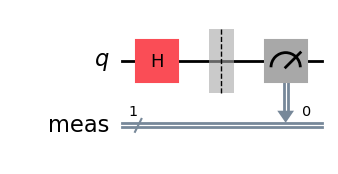

In [1]:
import numpy as np
import random
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import  MCXGate
from qiskit.quantum_info import Statevector
from qiskit_algorithms import AmplificationProblem
from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider,least_busy 
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.measure_all()
circuit.draw('mpl',fold=-1)

## Our first quantum circuit

The following quantum circuit prepares an entangled state $\ket{\psi}=\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})$.

Try to understand the syntax. You can may try to add other gates, add qubits, see eg https://docs.quantum.ibm.com/api/qiskit/circuit_library

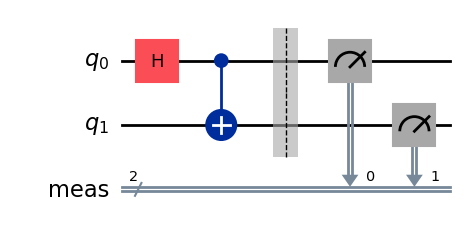

In [2]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure_all()
circuit.draw('mpl',fold=-1)

## Simulating the circuit on your laptop with Qiskit

The Aer module allows us to simulate the quantum circuit on your laptop. There is no interaction at all with a quantum machine. Instead, the solver represents the final state as a vector $\psi$ of dimension $2^{\# qubits}$ and sample numerically bitstrings from $|\psi|^2$. 

Execute the following code and analyze the structure of the result object.
Plot results using the function ```plot_histogram```
Write a function to extract the correlations $\langle \psi|Z_1Z_2|\psi \rangle$.
Analyze the role of the number of shots.

In [3]:
aersim = AerSimulator()
transpiled_circuit = transpile(circuit, aersim)
result = aersim.run(transpiled_circuit, shots=1000).result()
counts = result.get_counts()
print("Counts : ",counts)

Counts :  {'11': 497, '00': 503}


## Execute the circuit on a quantum computer

The IBMprovider service allows us to send our circuit (as a Python object) to an IBM server (classical computer), where it will be translated to a list of pulse instructions to be executed on one of their quantum computers. In a nutshell, we can effectively run the circuit on the quantum computer. One can then retrieve the results (bitstrings counts).

Explore the technical details for each quantum device https://quantum.ibm.com/services/resources

In [ ]:
#Load credentials (copy the token from your IBM account)
IBMProvider.save_account(token='',overwrite=True)
provider = IBMProvider(instance='ibm-q/open/main')

In [29]:
#Choose a quantum device
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Chosen quantum computer ", backend)

Chosen quantum computer  <IBMBackend('ibm_kyoto')>


In [51]:
shots = 1024
circ = transpile(circuit,backend=backend)
job = backend.run(circ, shots=shots)
print("Job has been started with ID : ", job)

Job has been started with ID :  <IBMCircuitJob('cqsh9cdtxzj0008xxbz0')>


## Analyzing the results of the quantum computer

Results can be retrieved using ```results = job.result()``` (active session). For an old job session, you can use before ```job = provider.runtime.job('JOB_ID')```

You can check jobs scheduling in https://quantum.ibm.com/jobs

Analyze the quality of your experimental realization of the Bell state. Assess the quality of $Z_1Z_2$ correlations in the quantum computer.

None


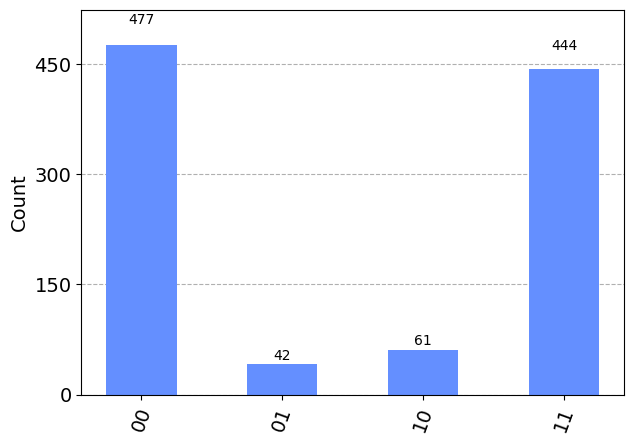

In [54]:
job = provider.retrieve_job('cqsh9cdtxzj0008xxbz0')
print(job.queue_info())
plot_histogram(job.result().get_counts())


# Grover's Algorithm

Let us now code Grover's algorithm. We assume here we are given a quantum oracle `black box` quantum circuit. The following code block does this for you for a random state ```state``` variable

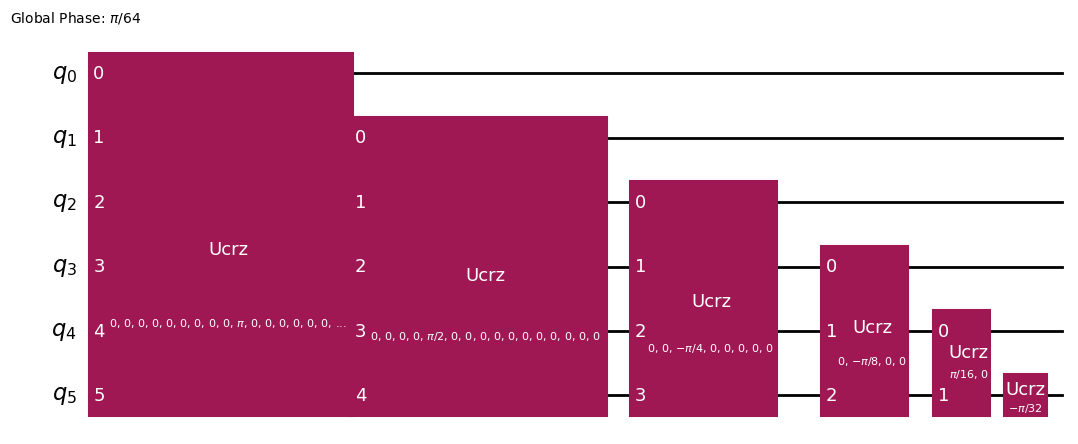

In [45]:
n = 6 ##number of qubits
state = ''.join(random.choice(['0','1']) for i in range(n))
pre_oracle = Statevector.from_label(state)
oracle = AmplificationProblem(pre_oracle, is_good_state=state)
oracle = oracle.grover_operator.oracle.decompose()
oracle.draw('mpl')


Write a function that returns a quantum circuit with a Hadamard applied on each qubit

In [ ]:
def init(n):
    ####
    return 

Write a function that returns Grover's diffuser circuit. I wrote the part with the Toffoli gate. 

In [ ]:
def diffuser(n):
    ## ..
    mcx_gate = MCXGate(nqubits-1)
    circuit.append(mcx_gate,range(nqubits))
    ## ....
    return circuit

Test the following circuit corresponding to one iteration of Grover's algorithm (using Qiskit simulator). 

Comment on the value of ```result.get_counts()[state]```

In [ ]:
circuit = QuantumCircuit(n)
circuit &= init(n)
for s in range(t):
     circuit&=oracle
     circuit.barrier()
     circuit&=diffuser(n)
circuit.measure_all()
circuit.draw('mpl',fold=-1)

Adapt the circuit to perform an arbitrary number of iterations. Analyze the required number of iterations to reveal the solution, as a function of the number of qubits. Try to run the code on a quantum computer.